In [0]:
#Upload the zip folders to the DBFS folder
#Create the variable fileroot to save the required zipped folder  and assign to the zipped folder name
fileroot = "clinicaltrial_2023"
#Copy the uploaded zip file from D file system to the cluster's file system
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
#import ps and assign the environment variable to fileroot
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
#Switch to shell and use the unzip to unzip the zipped folder
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
#Move the unzipped csv file from the file system to the DBFS
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv" , "/FileStore/tables/" , True)

True

In [0]:
#Create the variable fileroot to save the required zipped folder  and assign to the zipped folder name
fileroot = "pharma"
#Copy the uploaded zip file from D file system to the cluster's file system
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
#import os and assign the environment variable to fileroot
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
#Switch to shell and use the unzip to unzip the zipped folder
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#Move the unzipped csv file from the file system to the DBFS
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv" , "/FileStore/tables/" , True)

True

In [0]:
#Confirm the unzipped csv file is in the right DBFS location for both files
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709140371000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710957989000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706721471000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706718922000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714509845000),
 FileInfo(pat

In [0]:
#Delete the zipped folders form DBFS for memory optimization
dbutils.fs.rm("/FileStore/tables/clinicaltrial_2023.zip")

True

In [0]:
#Delete the zipped folders form DBFS for memory optimization
dbutils.fs.rm("/FileStore/tables/pharma.zip")

True

In [0]:
#View the clinical trial csv file
dbutils.fs.head("/FileStore/tables/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
#View the pharma csv file
dbutils.fs.head("/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]


'"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s car

In [0]:
#Define function to create RDD from csv files
def createRDD(file_csv):
    #Use the sc.textFile() function to create a RDD from the file
    RDD = sc.textFile(f"/FileStore/tables/{file_csv}.csv")
    return RDD
#Execute function to create the RDDs for the clinicaltrial_2023.csv file
RDD1 = createRDD("clinicaltrial_2023")
#Output the result
RDD1.take(4)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
#Execute function to create the RDD for the pharma.csv file
RDD2 = createRDD("pharma")
#Output the result
RDD2.take(4)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
#Clean the clinical trial file
# Function to clean file
def cleanFile(row):
    # strip()method is used to remove leading and trailing commas and double quotes
    cleanFile = row.strip(',').strip('"')
    # For this file, the delimiter is \t, so each record was splitted using the split() method
    cleanFile = cleanFile.split('\t')
    return cleanFile
RDD1 = RDD1.map(cleanFile)
RDD1.take(10)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

In [0]:
#Extra Data Cleaning
#Fill up empty cells with empty strings in the required cells
def fillUpCell(cell):
    newCell = 14 - len(cell)
    if len(cell) < 14:
        cell += [''] * newCell
    return cell

#Format date to have the same format-YYYY-MM-DD,while filling up incomplete dates with '-01
def FormatDate(date):
    if len(date) != 10:
        date = date + '-01'
    return date

# Execute the functions and map them to the RDD1 to clean the RDD
clinicaltrial_RDD = RDD1.map(lambda row: [FormatDate(row[index]) if index in [12, 13] else row[index] for index in range(len(row))])\
                        .map(fillUpCell)
#Return the cleaned RDD

clinicaltrial_RDD.take(5)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start-01',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular 

In [0]:
# Cleaning the pharma data 
def cleanPharma(row):
    # strip()method is used to remove leading and trailing commas and double quotes
    # For this file, the delimiter is ',', so each record was splitted using the split() method
    pharmaClean = row.replace('"', '')\
                     .split(',')
    return pharmaClean

#Execute the function on RDD2
pharma_RDD = RDD2.map(cleanPharma)

# Extract the Parent_Company column
pharma_RDD = pharma_RDD.map(lambda row: [row[1]])

# Show the first 10 rows after removing extra double quotes
pharma_RDD.take(10)

[['Parent_Company'],
 ['Abbott Laboratories'],
 ['AbbVie'],
 ['AbbVie'],
 [' Inc.'],
 ['Johnson & Johnson'],
 ['Abbott Laboratories'],
 [' Inc.'],
 ['Johnson & Johnson'],
 [' a division of Ethicon Inc.']]

In [0]:
###Problem Statement 1---Number of distinct studies in the dataset
# Extract the header row
file_header = clinicaltrial_RDD.first()

# Filter the clinicaltrial RDD to not include the header using filter()
#Map() returns a new RDD that contains the first column of each row.
#The distinct ids(row[0]) is counted using the distinct() and count() functions
distinct_study_count= clinicaltrial_RDD.filter(lambda row: row != file_header)\
                                        .map(lambda row: row[0]).distinct().count()
#print the result
print("The number of distinct studies in the dataset is", distinct_study_count)

The number of distinct studies in the dataset is 483422


In [0]:
##Problem Statement 2---List all the types of studies along with the frequencies of each type
Type_index = clinicaltrial_RDD.first().index('Type')

#Filter the RDD for rows that contain the type column
#Map the values to a new RDD with key-value pair being key (Type) and value(1)
#Filter out the header row
#Group the keys and sum the values of the grouped keys 
#Filter out rows with empty strings
#Sort the RDD by the column that contains the sums in descending order
#Execute and return the RDD
clinicaltrial_RDD.filter(lambda x: len(x) > Type_index + 1) \
                 .map(lambda x: (x[Type_index], 1)) \
                 .filter(lambda row: row[0] != 'Type') \
                 .reduceByKey(lambda a,b: a + b) \
                 .filter(lambda x: x[0] != '') \
                 .sortBy(lambda x: x[1], ascending=False) \
                 .collect()


[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

In [0]:
#Problem Statement 3----Top 5 conditions with their frequencies
#Get the index of the Conditions column
Column_Index = clinicaltrial_RDD.first().index('Conditions')
#FlatMap the RDD by splitting the values on |
#Filter out the header-Conditions
#Filter out the empty rows
#Map the resulting RDD with 1 to create the key-value pair
#Use reduceByKey to reduce the RDD to distinct keys (Conditions) and the sum of its values
#Sort by the sums in descending orde
#Return only the first 5 rows
clinicaltrial_RDD.flatMap(lambda x: x[Column_Index].split('|'))\
                 .filter(lambda row: row != 'Conditions')\
                 .filter(lambda row: row != '')\
                 .map(lambda x: (x, 1))\
                 .reduceByKey(lambda a,b: a + b)\
                 .sortBy(lambda x: x[1], ascending=False)\
                 .take(5)

[('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4071),
 ('Hypertension', 4020)]

In [0]:
#Problem Statement 4---- Top 10 most common non-pharma sponsors with the number of clinical trials they have sponsored
# Extract the seventh column from the processed data RDD and the second column from the pharmaceutical data RDD
clinical_trial_sponsors = clinicaltrial_RDD.map(lambda row: row[6])
pharma_sponsors = set(pharma_RDD.map(lambda row: row[0]).collect())
# Filter out the pharmaceutical sponsors
non_pharma_trial_sponsors_rdd = clinical_trial_sponsors.filter(lambda sponsor: sponsor not in pharma_sponsors)
#Map the resulting RDD with 1 to create the key-value pair
#Use reduceByKey to reduce the RDD to distinct keys(sponsors) and the sum of its values
#Sort by the sums in descending order
#Return only the first 10 rows
non_pharma_trial_sponsors_rdd.map(lambda sponsor: (sponsor, 1))\
                                                .reduceByKey(lambda a, b: a + b)\
                                                .sortBy(lambda x: x[1], ascending=False)\
                                                .take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

In [0]:
#Problem Statement 5 ---- Number of Completed Studies for each month in 2023
# Create a dictionary month_dict that maps month names to their corresponding index
month_dict = {"01": "Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06":"Jun", "07":"Jul", "08":"Aug", "09":"Sept", "10":"Oct", "11":"Nov", "12":"Dec"}

Completion_index = clinicaltrial_RDD.first().index('Completion')
Status_index = clinicaltrial_RDD.first().index('Status')
#Filter out incomplete records
#Map to the index of Completion and Status to extract the columns
#Filter out the header
#Filter out records that do not have the Status as Completed
#Map to extract the year and month of the COmpletion date
#Filter the resulting RDD for values first column is 2023
#Map the month names of the month column to 1 as a key-value pair
#Use reduceByKey to reduce the RDD to distinct keys(month_dict value) and the sum of its values
#Replace the key with the month name
#Return the result
Completed_RDD = clinicaltrial_RDD.filter(lambda x: len(x)== 14)\
                          .map(lambda x: (x[Completion_index], x[Status_index ]))\
                          .filter(lambda x: x[0] != 'Completion')\
                          .filter(lambda x: x[1] == 'COMPLETED')\
                          .map(lambda x: (x[0][5:7], x[0][0:4]))\
                          .filter(lambda x: x[1] == "2023")\
                          .map(lambda x: (x[0], 1))\
                          .reduceByKey(lambda a,b: a + b)\
                          .map(lambda x: (month_dict[x[0]], x[1]))\
                          .collect()

#Sort result as per the months
Completed_RDD_per_month = sorted(Completed_RDD, key=lambda x: list(month_dict.keys()).index(next(key for key, value in month_dict.items() if value == x[0])))
#print result
print(Completed_RDD_per_month)


[('Jan', 1494), ('Feb', 1272), ('Mar', 1552), ('Apr', 1324), ('May', 1415), ('Jun', 1619), ('Jul', 1360), ('Aug', 1230), ('Sept', 1152), ('Oct', 1058), ('Nov', 909), ('Dec', 1082)]


In [0]:
#Further Analysis #1----Number of trials per Funder Type
#Extract the header of the RDD
header = clinicaltrial_RDD.first()
#Get the index for the Funder Type column
FunderType_index = clinicaltrial_RDD.first().index('Funder Type')
#Filter out the header
#Map the contentes of the Funder Type column with 1 to create the key-value pair
#Use reduceByKey to reduce the RDD to distinct keys(Funder Type) and the sum of its values
#Sort by the sums in descending order
#Return the result
clinicaltrial_RDD.filter(lambda x: x != header)\
                 .map(lambda x: (x[FunderType_index], 1)) \
                 .reduceByKey(lambda x, y: x + y) \
                 .sortBy(lambda x: x[1], ascending=False) \
                 .collect()

[('OTHER', 336305),
 ('INDUSTRY', 113048),
 ('OTHER_GOV', 12377),
 ('NIH', 11193),
 ('FED', 4526),
 ('NETWORK', 4410),
 ('', 891),
 ('INDIV', 575),
 ('UNKNOWN', 94),
 ('AMBIG', 3)]

In [0]:
pip install seaborn #Install the seaborn library

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


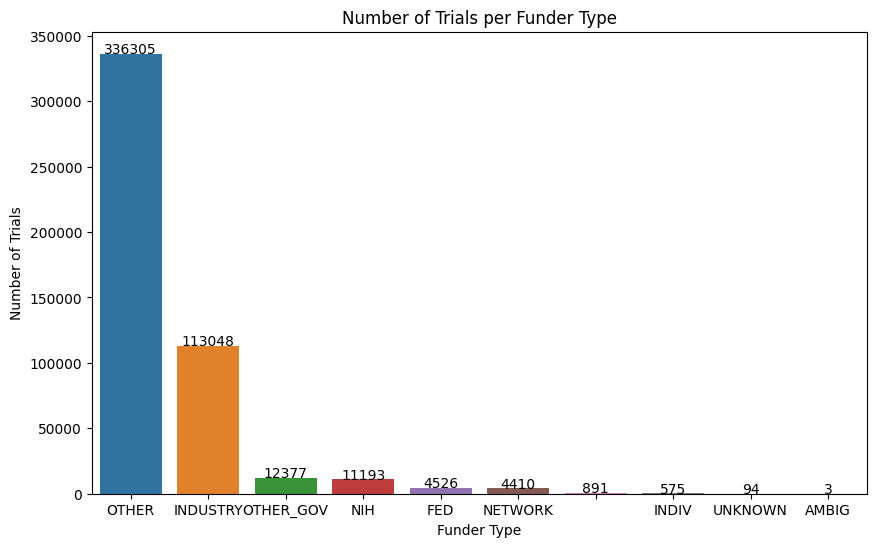

In [0]:
#Further Analysis #1-----Visualization
#Import the required libraries and functions
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the RDD to a list of tuples
data = clinicaltrial_RDD.filter(lambda x: x != header) \
                        .map(lambda x: (x[9], 1)) \
                        .reduceByKey(lambda x, y: x + y) \
                        .sortBy(lambda x: x[1], ascending=False) \
                        .collect()

# Convert the list of tuples to a DataFrame
df = pd.DataFrame(data, columns=['Funder Type', 'Number of Trials'])

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Funder Type', y='Number of Trials', data=df)

# Add the values to the bars
for index, row in df.iterrows():
    barplot.text(index, row['Number of Trials'], str(row['Number of Trials']), color='black', ha="center")

#label the x axis
plt.xlabel('Funder Type')
#label the y axis
plt.ylabel('Number of Trials')
#Create the title
plt.title('Number of Trials per Funder Type')
#Display plot
plt.show()
